In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import (classification_report, confusion_matrix, roc_auc_score,
                           RocCurveDisplay, mean_squared_error, mean_absolute_error, r2_score)
from sklearn.tree import DecisionTreeRegressor, plot_tree


In [ ]:
df = pd.read_csv('/content/2025_BUIS008W.3 Coursework Dataset (2).csv')

In [ ]:
df.describe()

,Month_of_Birth,Age,Grade,Tumor_Size,Regional_Node_Examined,Reginol_Node_Positive,Survival_Months
count,4024.000000,4015.000000,4024.000000,4021.000000,4023.000000,4024.000000,4024.000000
mean,6.481362,54.107098,2.150596,30.419299,14.373602,4.158052,71.472167
std,3.475442,11.715528,0.638234,21.161080,8.129293,5.109331,25.361855
min,1.000000,-50.000000,1.000000,-75.000000,1.000000,1.000000,1.000000
25%,3.000000,47.000000,2.000000,16.000000,9.000000,1.000000,56.000000
50%,6.000000,54.000000,2.000000,25.000000,14.000000,2.000000,73.000000
75%,10.000000,61.000000,3.000000,38.000000,19.000000,5.000000,90.000000
max,12.000000,502.000000,4.000000,140.000000,61.000000,46.000000,760.000000


In [ ]:
df.sum()

,0
Month_of_Birth,26081
Age,217256.0
T_Stage,T1T2T3T1T2T1T1T2T4T4T1T3T2T1T2T1T2T2T2T2T2T2T2...
N_Stage,N1N2N3N1N1N1N1N1N3N3N1N1N1N2N3N1N1N1N1N1N1N2N1...
6th_Stage,IIAIIIAIIICIIAIIBIIAIIAIIBIIICIIICIIAIIIAIIBII...
Differentiated,Poorly differentiatedModerately differentiated...
Grade,8654
A_Stage,RegionalRegionalRegionalRegionalRegionalRegion...
Tumor_Size,122491.0
Estrogen_Status,PositivePositivePositivePositivePositivePositi...


<Axes: xlabel='Mortality_Status', ylabel='count'>

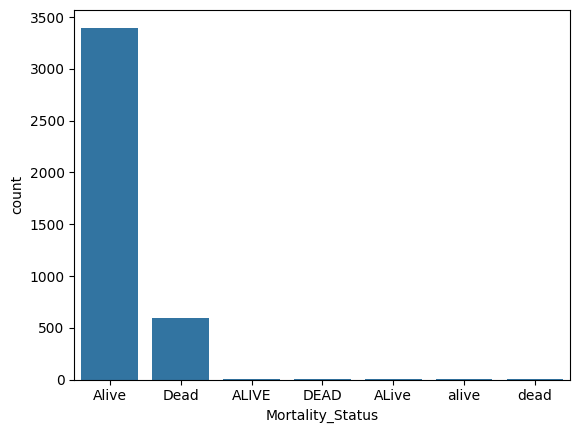

In [ ]:
sns.countplot(x='Mortality_Status', data=df)

In [ ]:
df = df.drop(columns=['Sex', 'Occupation','Patient_ID'])

In [ ]:
df.columns

Index(['Month_of_Birth', 'Age', 'T_Stage', 'N_Stage', '6th_Stage',
       'Differentiated', 'Grade', 'A_Stage', 'Tumor_Size', 'Estrogen_Status',
       'Progesterone_Status', 'Regional_Node_Examined',
       'Reginol_Node_Positive', 'Survival_Months', 'Mortality_Status'],
      dtype='object')

In [ ]:
df['Mortality_Status'] = df['Mortality_Status'].str.strip().str.lower()

In [ ]:
df['Mortality_Status'].value_counts()

,count
Mortality_Status,
alive,3408
dead,616


In [ ]:
df.loc[(df['Age'] <= 0) | (df['Age'] > 120), 'Age'] = np.nan
df.loc[df['Tumor_Size'] < 0, 'Tumor_Size'] = np.nan


In [ ]:
df.isnull().sum()

,0
Month_of_Birth,0
Age,12
T_Stage,0
N_Stage,0
6th_Stage,0
Differentiated,0
Grade,0
A_Stage,0
Tumor_Size,4
Estrogen_Status,0


In [ ]:
# For the 'Age' column
median_age = df['Age'].median()
df['Age'].fillna(median_age, inplace=True)

# For the 'Tumor_Size' column
median_tumor_size = df['Tumor_Size'].median()
df['Tumor_Size'].fillna(median_tumor_size, inplace=True)



/tmp/ipython-input-48-1526782382.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(median_age, inplace=True)
/tmp/ipython-input-48-1526782382.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [ ]:
median_rne = df['Regional_Node_Examined'].median()
df['Regional_Node_Examined'].fillna(median_rne, inplace=True)

/tmp/ipython-input-49-1246421778.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Regional_Node_Examined'].fillna(median_rne, inplace=True)


In [ ]:
# Shows the final shape (rows, columns)
print(df.shape)

# Shows the list of all column names
print(df.columns)

(4024, 15)
Index(['Month_of_Birth', 'Age', 'T_Stage', 'N_Stage', '6th_Stage',
       'Differentiated', 'Grade', 'A_Stage', 'Tumor_Size', 'Estrogen_Status',
       'Progesterone_Status', 'Regional_Node_Examined',
       'Reginol_Node_Positive', 'Survival_Months', 'Mortality_Status'],
      dtype='object')


In [ ]:
X = df.drop('Mortality_Status', axis=1)
y = df['Mortality_Status']

In [ ]:
X_encoded = pd.get_dummies(X)

In [ ]:


X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=123, stratify=y)

In [ ]:
# Create the scaler
scaler = StandardScaler()

# Fit the scaler ONLY on the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

In [ ]:



# Create and Apply the Scaler
scaler = StandardScaler()

# Fit the scaler ONLY on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the scaler that was fit on the training data
X_test_scaled = scaler.transform(X_test)



--- Logistic Regression Report ---
              precision    recall  f1-score   support

       alive       0.91      0.97      0.94       682
        dead       0.77      0.49      0.60       123

    accuracy                           0.90       805
   macro avg       0.84      0.73      0.77       805
weighted avg       0.89      0.90      0.89       805

--- Confusion Matrix ---
[[664  18]
 [ 63  60]]
AUC-ROC Score: 0.8889206780630856


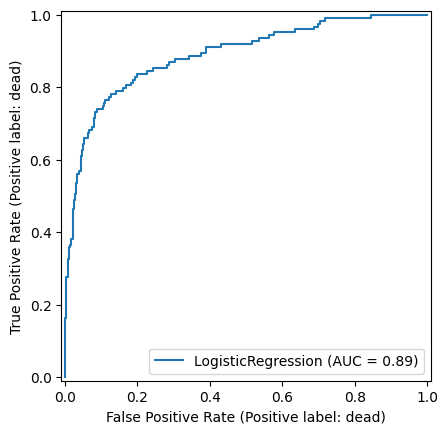

In [ ]:
#  Initialize and Train the Model
# For other models, you'd swap this line (e.g., with KNeighborsClassifier())
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Make Predictions
lr_predictions = lr_model.predict(X_test)

# Generate and Print Evaluations
# Classification Report (gives you precision, recall, f1-score)
print("--- Logistic Regression Report ---")
print(classification_report(y_test, lr_predictions))

# Confusion Matrix
print("--- Confusion Matrix ---")
print(confusion_matrix(y_test, lr_predictions))

# AUC-ROC Score
lr_auc = roc_auc_score(y_test, lr_model.predict_proba(X_test)[:, 1])
print(f"AUC-ROC Score: {lr_auc}")

# AUC-ROC Curve
RocCurveDisplay.from_estimator(lr_model, X_test, y_test)
plt.show()

--- K-Nearest Neighbors Report ---
              precision    recall  f1-score   support

       alive       0.91      0.97      0.94       682
        dead       0.73      0.47      0.57       123

    accuracy                           0.89       805
   macro avg       0.82      0.72      0.76       805
weighted avg       0.88      0.89      0.88       805

--- Confusion Matrix ---
[[661  21]
 [ 65  58]]
AUC-ROC Score: 0.8152671482726559


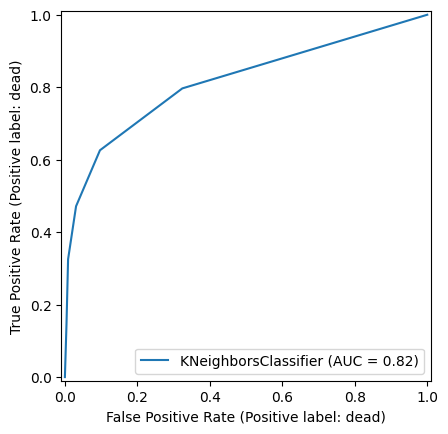

In [ ]:


#  Initialize and Train the Model
# We use KNeighborsClassifier for this model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

#  Make Predictions
knn_predictions = knn_model.predict(X_test)

# Generate and Print Evaluations
print("--- K-Nearest Neighbors Report ---")
print(classification_report(y_test, knn_predictions))

print("--- Confusion Matrix ---")
print(confusion_matrix(y_test, knn_predictions))

# AUC-ROC Score
knn_auc = roc_auc_score(y_test, knn_model.predict_proba(X_test)[:, 1])
print(f"AUC-ROC Score: {knn_auc}")

# AUC-ROC Curve
RocCurveDisplay.from_estimator(knn_model, X_test, y_test)
plt.show()


--- Evaluating: Naive Bayes ---
              precision    recall  f1-score   support

       Alive       0.90      0.85      0.88       682
        Dead       0.38      0.50      0.43       123

    accuracy                           0.80       805
   macro avg       0.64      0.67      0.65       805
weighted avg       0.82      0.80      0.81       805



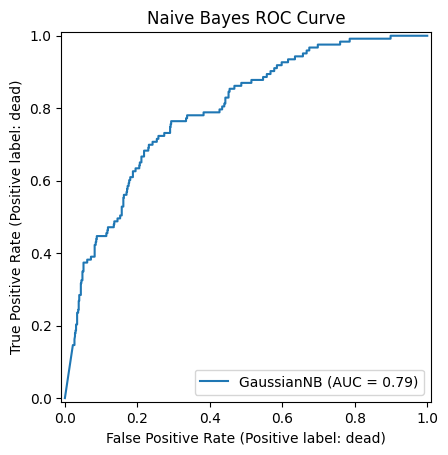

In [ ]:
# Model 3: Gaussian Naive Bayes
print("\n--- Evaluating: Naive Bayes ---")
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)
nb_predictions = nb_model.predict(X_test_scaled)
print(classification_report(y_test, nb_predictions, target_names=['Alive', 'Dead']))
RocCurveDisplay.from_estimator(nb_model, X_test_scaled, y_test)
plt.title("Naive Bayes ROC Curve")
plt.show()

In [ ]:
# 1. Define the hyperparameters you want to test for Logistic Regression
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'saga']   # Different optimization algorithms
}

# 2. Set up and run GridSearchCV
# Note: Use a base LogisticRegression model and specify max_iter to avoid convergence warnings
# Add n_jobs=-1 to use all available processors
grid_search = GridSearchCV(LogisticRegression(max_iter=2000),
                         param_grid,
                         cv=5,
                         scoring='roc_auc',
                         n_jobs=-1)

grid_search.fit(X_train_scaled, y_train)


# 3. Get the best parameters and the new best model
print(f"Best Hyperparameters: {grid_search.best_params_}")
tuned_lr_model = grid_search.best_estimator_

# 4. Evaluate the new tuned model
tuned_predictions = tuned_lr_model.predict(X_test_scaled)
print("\n--- Tuned Model Confusion Matrix ---")
print(confusion_matrix(y_test, tuned_predictions))

print("\n--- Tuned Model Classification Report ---")
print(classification_report(y_test, tuned_predictions))

Best Hyperparameters: {'C': 0.1, 'solver': 'saga'}

--- Tuned Model Confusion Matrix ---
[[665  17]
 [ 65  58]]

--- Tuned Model Classification Report ---
              precision    recall  f1-score   support

       alive       0.91      0.98      0.94       682
        dead       0.77      0.47      0.59       123

    accuracy                           0.90       805
   macro avg       0.84      0.72      0.76       805
weighted avg       0.89      0.90      0.89       805



In [ ]:
# 1. Initialize your two best base learners
# Use the untuned base models for this task
lr_clf = LogisticRegression(max_iter=2000)
knn_clf = KNeighborsClassifier()

# 2. Create the soft voting ensemble
# We use 'soft' voting to average the probabilities, which is often better
ensemble_clf = VotingClassifier(
    estimators=[('lr', lr_clf), ('knn', knn_clf)],
    voting='soft'
)

# 3. Train the ensemble model on your scaled data
ensemble_clf.fit(X_train_scaled, y_train)

# 4. Evaluate the ensemble model
ensemble_predictions = ensemble_clf.predict(X_test_scaled)

print("--- Ensemble Model Classification Report ---")
print(classification_report(y_test, ensemble_predictions))

print("--- Ensemble Model Confusion Matrix ---")
print(confusion_matrix(y_test, ensemble_predictions))

--- Ensemble Model Classification Report ---
              precision    recall  f1-score   support

       alive       0.90      0.98      0.94       682
        dead       0.75      0.37      0.50       123

    accuracy                           0.89       805
   macro avg       0.83      0.68      0.72       805
weighted avg       0.87      0.89      0.87       805

--- Ensemble Model Confusion Matrix ---
[[667  15]
 [ 77  46]]


In [ ]:

print("\n\n--- Starting Case Study B: Regression ---")

# Step 9: Prepare Data for Regression
# Use the cleaned dataframe from Step 3 and filter it for the target cohort.
regression_df = df[df['Mortality_Status'] == 'dead'].copy()

# Define features (X_reg) and target (y_reg)
X_reg = regression_df.drop(columns=['Survival_Months', 'Mortality_Status'])
y_reg = regression_df['Survival_Months']

# One-hot encode the regression features
X_reg_encoded = pd.get_dummies(X_reg, drop_first=True)

# Split this specific regression data into its own training and testing sets
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(
    X_reg_encoded, y_reg, test_size=0.2, random_state=123)
print("Data prepared for regression.")



--- Starting Case Study B: Regression ---
Data prepared for regression.


In [ ]:
# Step 10: Build and Evaluate Regression Models
# DT-1: Fully Grown Decision Tree Regressor
dt1_model = DecisionTreeRegressor(random_state=123)
dt1_model.fit(X_reg_train, y_reg_train)

#  DT-2: Pruned Decision Tree Regressor (max_depth=4)
dt2_model = DecisionTreeRegressor(max_depth=4, random_state=123)
dt2_model.fit(X_reg_train, y_reg_train)

#  Evaluate both models
dt1_predictions = dt1_model.predict(X_reg_test)
dt2_predictions = dt2_model.predict(X_reg_test)
print("\n--- Regression Evaluation Metrics ---")
print(f"DT-1 (Fully Grown) -> MAE: {mean_absolute_error(y_reg_test, dt1_predictions):.2f}, MSE: {mean_squared_error(y_reg_test, dt1_predictions):.2f}, R-Square: {r2_score(y_reg_test, dt1_predictions):.2f}")
print(f"DT-2 (Pruned)      -> MAE: {mean_absolute_error(y_reg_test, dt2_predictions):.2f}, MSE: {mean_squared_error(y_reg_test, dt2_predictions):.2f}, R-Square: {r2_score(y_reg_test, dt2_predictions):.2f}")



--- Regression Evaluation Metrics ---
DT-1 (Fully Grown) -> MAE: 30.56, MSE: 1455.66, R-Square: -0.94
DT-2 (Pruned)      -> MAE: 22.72, MSE: 789.24, R-Square: -0.05


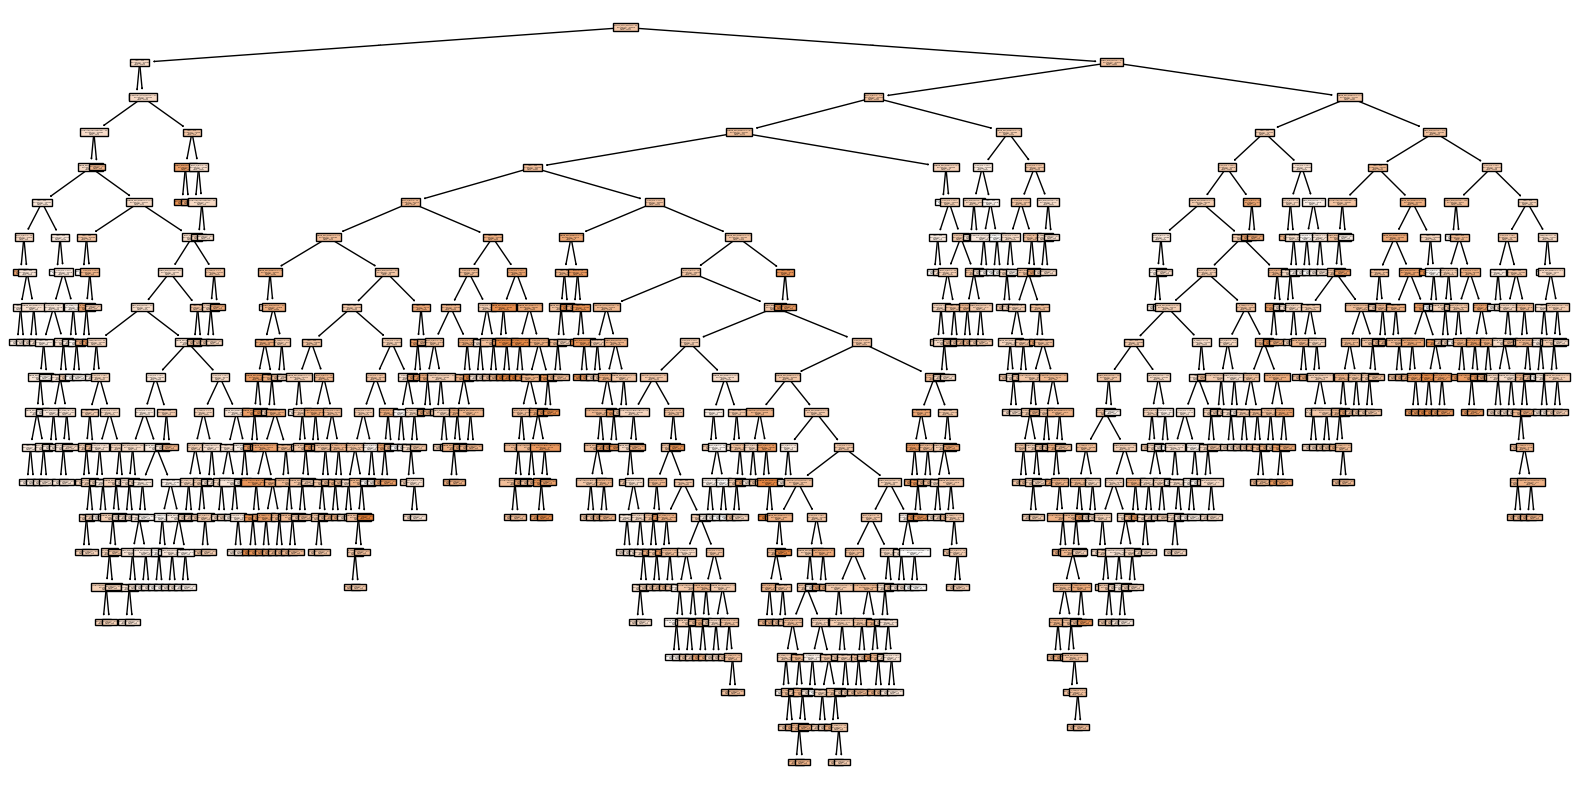

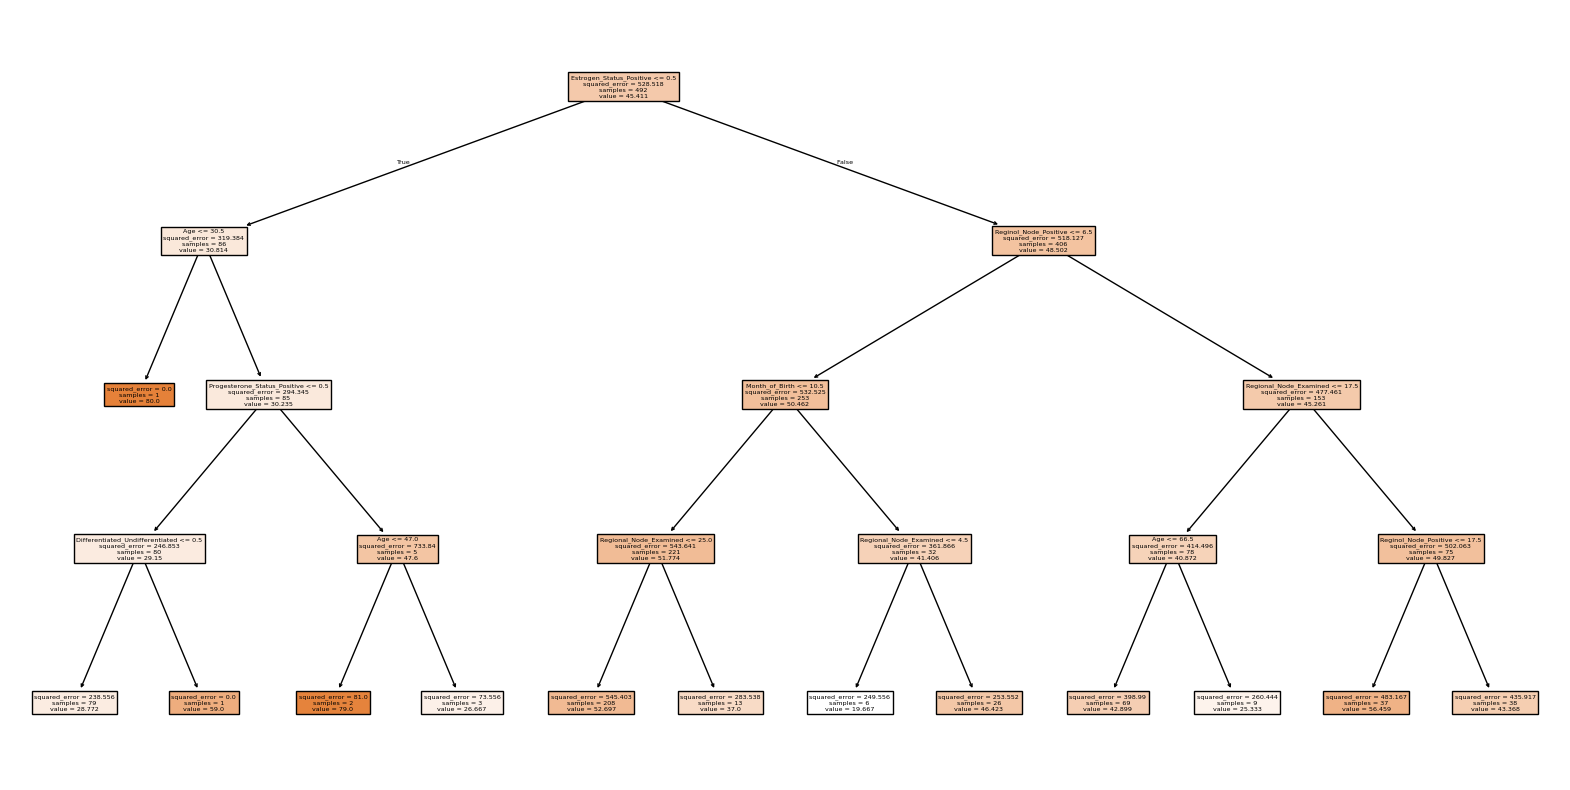

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

#  Visualize the fully grown tree (DT-1)
# This will likely be very large and hard to read
plt.figure(figsize=(20,10))
plot_tree(dt1_model, feature_names=X_reg_encoded.columns, filled=True)
plt.show()


#  Visualize the pruned tree (DT-2)
# This will be much smaller and more interpretable
plt.figure(figsize=(20,10))
plot_tree(dt2_model, feature_names=X_reg_encoded.columns, filled=True)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Make predictions with both models
dt1_predictions = dt1_model.predict(X_reg_test)
dt2_predictions = dt2_model.predict(X_reg_test)
 #Evaluate DT-1 (Fully Grown)
dt1_mse = mean_squared_error(y_reg_test, dt1_predictions)
dt1_mae = mean_absolute_error(y_reg_test, dt1_predictions)
dt1_r2 = r2_score(y_reg_test, dt1_predictions)

print("--- DT-1 (Fully Grown) Scores ---")
print(f"MSE: {dt1_mse}")
print(f"MAE: {dt1_mae}")
print(f"R-Square: {dt1_r2}")


dt2_mse = mean_squared_error(y_reg_test, dt2_predictions)
dt2_mae = mean_absolute_error(y_reg_test, dt2_predictions)
dt2_r2 = r2_score(y_reg_test, dt2_predictions)

print("\n--- DT-2 (Pruned) Scores ---")
print(f"MSE: {dt2_mse}")
print(f"MAE: {dt2_mae}")
print(f"R-Square: {dt2_r2}")

--- DT-1 (Fully Grown) Scores ---
MSE: 1455.6612903225807
MAE: 30.56451612903226
R-Square: -0.9384672092443989

--- DT-2 (Pruned) Scores ---
MSE: 789.2431128279192
MAE: 22.717601383475575
R-Square: -0.05101502973941252


 10. PREDICT SURVIVAL FOR PATIENT B002565

In [71]:



patient_b002565_data = {
    'Month_of_Birth': [7],
    'Age': [29],
    'Grade': [2],
    'Tumor_Size': [41],
    'Regional_Node_Examined': [5],
    'Regional_Node_Positive': [1],
    'T_Stage_T2': [False], 'T_Stage_T3': [True], 'T_Stage_T4': [False],
    'N_Stage_N2': [False], 'N_Stage_N3': [False],
    '6th_Stage_IIB': [False], '6th_Stage_IIIA': [False], '6th_Stage_IIIB': [False], '6th_Stage_IIIC': [True],
    'Differentiated_Poorly differentiated': [False], 'Differentiated_Undifferentiated': [False], 'Differentiated_Well differentiated': [False],
    'A_Stage_Regional': [True],
    'Estrogen_Status_Positive': [False],
    'Progesterone_Status_Positive': [True]
}
patient_df = pd.DataFrame(patient_b002565_data)


patient_df_processed = patient_df.reindex(columns=X_reg_train.columns, fill_value=False)

predicted_survival = dt2_model.predict(patient_df_processed)
print("\n=========================================")
print(f"Prediction for Patient B002565:")
print(f"Estimated Survival Months: {predicted_survival[0]:.2f} months")
print("=========================================")


Prediction for Patient B002565:
Estimated Survival Months: 80.00 months
